# VESTIAIRE COLLECTIVE ANALYSIS: Part 4
### *Exercise 6.4 Supervised Machine Learning: Regression*

### 1 & 2. Importing Libraries and Intalling libraries

In [1]:
pip install scikit - learn

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '-'


In [5]:
# Importing libraries
import numpy as np
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [7]:
# Importing Data
path = r'C:\Users\solving\Desktop\Nuria\Achivement 6'
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'vestiaire_ranges.csv'), index_col = False)

### 3. Cleaning Data

In [10]:
df.isnull().sum()

product_id                    0
product_type                  0
product_name                  0
product_description           0
product_keywords              0
product_gender_target         0
product_category              0
product_season                0
product_condition             0
product_like_count            0
sold                          0
reserved                      0
available                     0
in_stock                      0
should_be_gone                0
brand_id                      0
brand_name                    0
brand_url                     0
product_material              0
product_color                 0
price_usd                     0
seller_price                  0
seller_earning                0
seller_badge                  0
has_cross_border_fees         0
buyers_fees                   0
warehouse_name                0
seller_id                     0
seller_username               0
usually_ships_within          0
seller_country                0
seller_p

In [12]:
df.shape

(900461, 38)

In [19]:
df.dtypes

product_id                      int64
product_type                   object
product_name                   object
product_description            object
product_keywords               object
product_gender_target          object
product_category               object
product_season                 object
product_condition              object
product_like_count              int64
sold                             bool
reserved                         bool
available                        bool
in_stock                         bool
should_be_gone                   bool
brand_id                        int64
brand_name                     object
brand_url                      object
product_material               object
product_color                  object
price_usd                     float64
seller_price                  float64
seller_earning                float64
seller_badge                   object
has_cross_border_fees            bool
buyers_fees                   float64
warehouse_na

The dataset is already clean and no further action is needed in this step.

### 4. Exploring data visually

Text(0, 0.5, 'Like count')

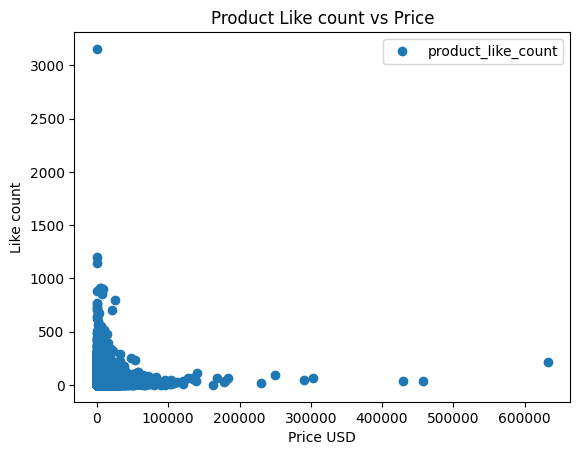

In [63]:
splot = df.plot( x = 'price_usd', y = 'product_like_count', style = 'o')
plt.title('Product Like count vs Price')
plt.xlabel('Price USD')
plt.ylabel('Like count')

### 5. Hypothesis
If a product has a higher price, it will have a higher number of likes

### 6. Reshape into Numpy Arrays

In [94]:
X = df['price_usd'].values.reshape(-1, 1)
y = df['product_like_count'].values.reshape(-1, 1)

In [38]:
X

array([[ 272.92],
       [ 127.8 ],
       [1278.  ],
       ...,
       [ 191.7 ],
       [  57.51],
       [ 958.5 ]])

In [40]:
y

array([[34],
       [ 1],
       [ 2],
       ...,
       [ 0],
       [27],
       [47]], dtype=int64)

### 7. Splitting Data

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

### 8. Linear Regression

In [55]:
# Creating a Regression object
regression = LinearRegression()

In [57]:
# FIRST in the training set
regression.fit(X_train, y_train)

LinearRegression()

In [65]:
# Predict y values using X
y_predicted = regression.predict(X_test)

### 9 & 10. Plot

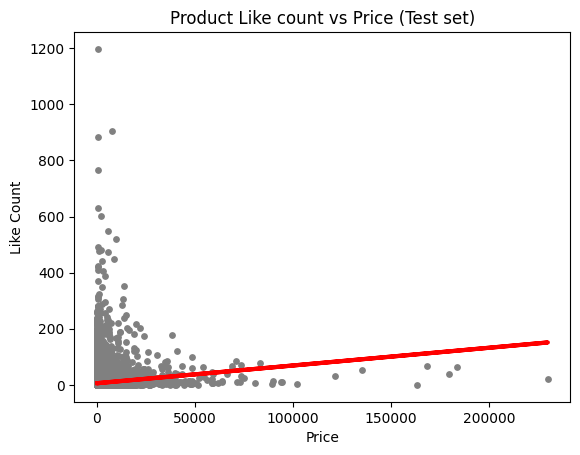

In [67]:
# Plot with Regression Line
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Product Like count vs Price (Test set)')
plot_test.xlabel('Price')
plot_test.ylabel('Like Count')
plot_test.show()

The line shows a slight positive relationship between both variables, supporting the hypothesis. On the other hand we can see that most of the dots accumulate in a smaller section in the left side of the plot. Furthermore, the majority of them are cramped on top of the red line, meaning that there are many products on the lower price range that have a higher amount of likes.
It is necessary to check the model performance statistics to ensure that the model works effectively.
It might also be interesting to replot the data excluding outliers.

### 11. Model Performance Statistics

In [106]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [108]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00101136]]
Mean squared error:  158.3354083998208
R2 score:  0.009907493662804856


### 12. Predicted y values vs actual values

In [77]:
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1,6.372008
1,2,6.196606
2,0,6.170241
3,8,6.093569
4,0,6.109710
5,10,6.629462
6,0,6.096796
7,1,6.273543
8,10,6.097604
9,28,7.817408


### 13. Reflections

The  model has shown to not work in the statistic tests. The Slope shows an almost insignifican relationship between the variables with a vlaue of 0.0006 and the R2 score is too low, with what could be translated to a value of  1%. Lastly, when comparing the actual and predicted values, we can quickly see that there is a big difference between them.
Although the statistics don't show a negative relationship between the variables, visually, the plot seems to suggest this. I considered this hypothesis thinking that those products that accumulate more likes might be those that people aspire to have, more special pieces that are pricier, but data shows that people tend to like items that are priced lower. This other approach makes sense, people like items the same way they would put them in a 'save for later' list so that they can buy them in another occasion. In previous analysis we saw that buyers look for items priced lower, supporting this new resolution.